In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import index

import seaborn as sns

from sklearn.preprocessing import StandardScaler

# done by us
from auxFunctions import *

In [20]:
df_read = pd.read_csv('Proj1_Dataset.csv')
df_read_without_time = df_read
df_read_without_time = df_read_without_time.drop(['Date','Time','Persons'], axis=1)

output = df_read['Persons']

listOfFeatures = [
    "S1Temp",
    "S2Temp",
    "S3Temp",
    "S1Light",
    "S2Light",
    "S3Light",
    "CO2",
    "PIR1",
    "PIR2"
] 

# Verify if there's missing data

In [21]:
for value in listOfFeatures:
    print(value + " = " + str(df_read[value].shape[0]))

# conclusion, it doesn't seem like there's any missing data

S1Temp = 10129
S2Temp = 10129
S3Temp = 10129
S1Light = 10129
S2Light = 10129
S3Light = 10129
CO2 = 10129
PIR1 = 10129
PIR2 = 10129


# Z-Score

In [22]:
stander = StandardScaler().fit_transform(df_read_without_time.values)

project_df = pd.DataFrame(stander, index=df_read_without_time.index, columns=df_read_without_time.columns)

# Temperature

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 3))
plt.subplot(1,3,1)
project_df.S1Temp.plot()
plt.subplot(1,3,2)
project_df.S2Temp.plot(ax=plt.gca())
plt.subplot(1,3,3)
project_df.S3Temp.plot(ax=plt.gca())
plt.show()

# Light

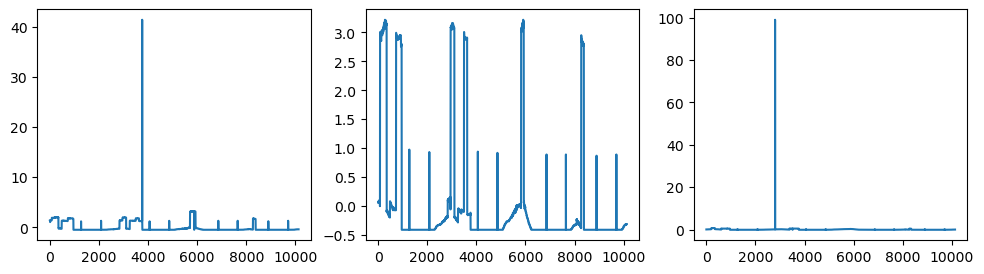

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(12, 3))
plt.subplot(1,3,1)
project_df.S1Light.plot()
plt.subplot(1,3,2)
project_df.S2Light.plot(ax=plt.gca())
plt.subplot(1,3,3)
project_df.S3Light.plot(ax=plt.gca())
plt.show()

# CO2

In [ ]:
project_df['CO2'].plot()

# PIR

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(9, 2))
plt.subplot(1,2,1)
project_df.PIR1.plot()
plt.subplot(1,2,2)
project_df.PIR2.plot(ax=plt.gca())
plt.show()

# Removing Basic Outliers

In [ ]:
indexes ,outlier = detectSamples(project_df['S1Light'], 4)
new_project = removeLine(project_df, indexes=indexes)

indexes ,outlier = detectSamples(project_df['S3Light'], 4)
new_project = removeLine(new_project, indexes=indexes)

indexes ,outlier = detectSamples(project_df['S1Temp'], 4)
new_project = removeLine(new_project, indexes=indexes)

indexes ,outlier = detectSamples(project_df['S3Temp'], 4)
new_project = removeLine(new_project, indexes=indexes)

# FIGURE
fig, axs = plt.subplots(2, 3, figsize=(12, 3))
# LIGHT
plt.subplot(2,3,1)
new_project.S1Light.plot()
plt.subplot(2,3,2)
new_project.S2Light.plot(ax=plt.gca())
plt.subplot(2,3,3)
new_project.S3Light.plot(ax=plt.gca())
# TEMP
plt.subplot(2,3,4)
new_project.S1Temp.plot()
plt.subplot(2,3,5)
new_project.S2Temp.plot(ax=plt.gca())
plt.subplot(2,3,6)
new_project.S3Temp.plot(ax=plt.gca())
plt.show()
